# 

> ## South African Language Idenification Model
>>#### Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

>>#### The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
>>#### From South African Government

In [1]:
import urllib.request
from PIL import Image

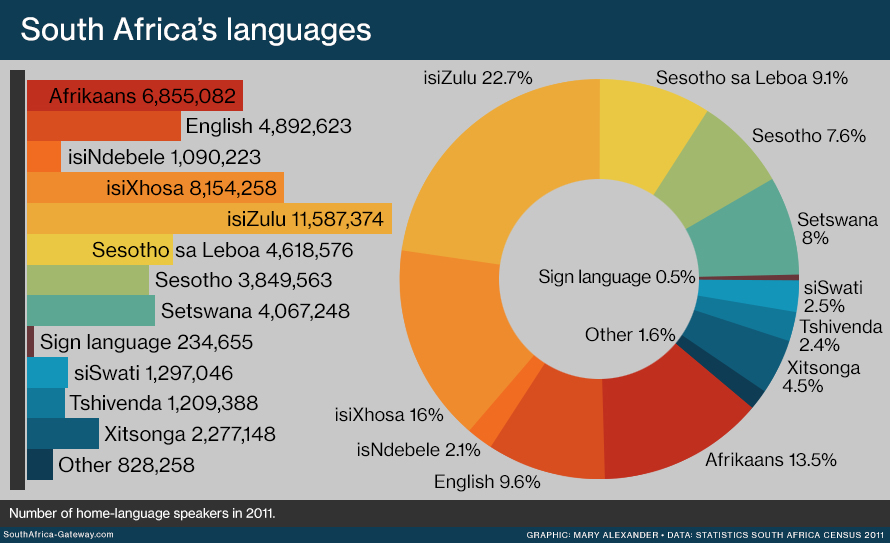

In [2]:
urllib.request.urlretrieve("https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media", "gfg.jpg")
  
img = Image.open("gfg.jpg")
img

> #### With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

>#### In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language    >Identification, the task of determining the natural language that a piece of text is written in.

importing the libraries that would be needed for this project

In [2]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# importing the Training set data using pandas library 
data = pd.read_csv("train_set.csv")
train_data = data.copy()

## Exploratory Data Analysis 

**Exploratory Data Analysis (EDA) :**  After loading in our dataset we first start with the vital component **EDA** to better understand the dataset we are working with and, to gain insight about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical` Analysis"

We take a look quick look at the first few rows of the `training` and `testing` dataset to have an overview of our features and labels, (using `pd.head()` method)

In [5]:
# Showing the first 5 rows of the dataframe for the train csv
train_data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


The data contains two columns, language Identity denoted as "lang_id" which is the `target` variable and other column is the "text" which is the `feature` variable

#### Next we take a look at the datatypes of our varibales to get a better understanding of our data

In [6]:
#Checking the data information 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


  Both variables are of the datatype `object`

#### Checking the shape of our data to know how many columns and rows we have to deal with 

In [7]:
# Checking the shape of the data
train_data.shape

(33000, 2)

The Dataframe has a total of `33000` rows and `2` columns

#### Checking if our Dataframe has any Null value 

In [8]:
# Check fro null values 
train_data.isnull().sum()

lang_id    0
text       0
dtype: int64

Our Dataframe has no empty values 

#### Now we explore our `Target` Variable to know how many unique languages are present and how many times they appear. 

In [9]:
#checking for unique values 
train_data['lang_id'].value_counts()

ven    3000
nso    3000
ssw    3000
tsn    3000
tso    3000
eng    3000
nbl    3000
afr    3000
sot    3000
xho    3000
zul    3000
Name: lang_id, dtype: int64

There are a total of `11` different languages, with each of them appearing a total of 3000 times.  

> ##### This is the meaning of the unique language IDs present in our dataframe!
>
> - `sot` is Sotho.
> - `afr` is Afrikaans
> - `tsn` is Tswana 
> - `ssw` is Swati
> - `xho` is Xhosa
> - `nso` is Northern Sotho 
> - `nbl` is Ndebele
> - `zul` is Zulu
> - `ven` is Venda
> - `eng` is English
> - `tso` is Tsonga


#### Let us visualize how our unique lang_id are distributed across our Data 


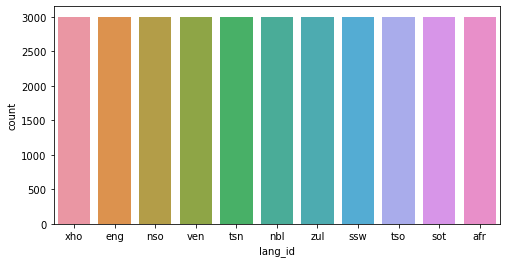

In [10]:
#ploting the distribution of unique label values
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="lang_id", data=train_data)

They are all distributed equally across our data, with each of them occuring `3000` times in our dataset 

#### Using Wordcloud library, we would create a visualization to see the frequent occuring words in all the tweets 

In [11]:
#importing the libraries 
from wordcloud import WordCloud

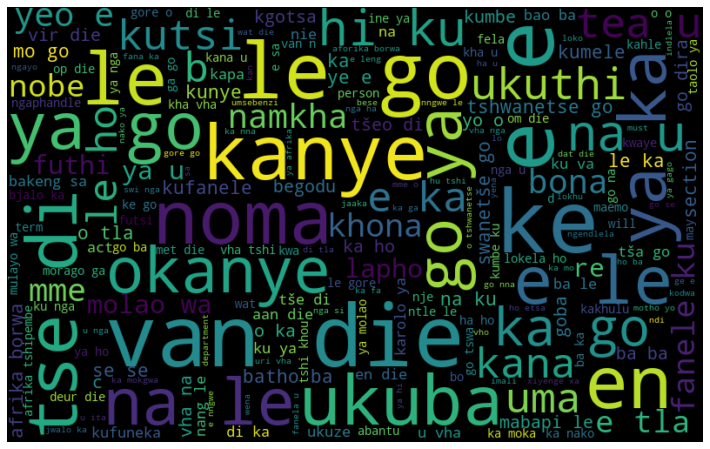

In [12]:
# Visualize the frequent words 
all_words = " ".join([sentence for sentence in train_data['text']])

wordcloud= WordCloud(width=800, height=500, random_state=50, max_font_size=100).generate(all_words)
# Plot the Graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

With wordcloud visualization, words that are more frequent appear to be bolder than the rest, examples of such words in our data
would be `kanye` , `die` , `go`, `le` and some others you can see from taking a look at the chart above. 

## **Next step is Data cleaning**

Before applying any ML model to a set of data we need first check our data to see if the data is in the state data we want it to be or do we need clean the data, well our case we need to clean the data moving on we will start the Data cleaning process

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
# Putting all the punctuation in a list 
punctuations = [i for i in string.punctuation]

In [6]:
# Function created to remove punctuations from our text
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [7]:
train_data['text'] = train_data['text'].apply(remove_punctuation)

In [8]:
def lower_case(x):
    return x.lower()
train_data['text'] = train_data['text'].apply(lower_case)

In [11]:
from nltk.corpus import stopwords
from nlppreprocess import NLP

In [12]:
# A function that would enable us remove the stopwords
stopword = stopwords.words('english')
def remove_stopwords(x):
    stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    x = stopwords.process(x)
    return x




In [13]:
#Applying the function to the dataset   
train_data['no_stopwords'] = train_data['text'].apply(lambda x: remove_stopwords(x))

We have succesfully removed all the punctuations, stopwords from our text. And also set our test as lowercase 

## Feature Engineering

In this step we would convert our text to vectors so the computer can understand, and also create features from it. We would also split ut data into trainng and testing set.
> And we would be using Naive-Bayes classifier and RidgeClassifier as our final estimator for our stacks 

### Splitting the Data

In [14]:
#Importing the library to split the data
from sklearn.model_selection import train_test_split

In [15]:
# Seperating the Data into X "Features" and y "Target" variables 
X, y = train_data['no_stopwords'], train_data['lang_id']

In [17]:
# Splitting into training and Testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=50)

In [18]:
# Checking the shape of our train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26400,)
(26400,)
(6600,)
(6600,)


In [19]:
 # Using sklearn's feature extraction vectorizer to convert words into vector for the computer to understand 
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# converting text to vectors and transforming the features  
tfid = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(2, 6), analyzer= 'char')
X_train = tfid.fit_transform(X_train)
X_test = tfid.transform(X_test)

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x000000BAEC701040>
Traceback (most recent call last):
  File "C:\Users\SAMUEL AMOS\anac\lib\site-packages\nltk\data.py", line 1159, in __del__
    if not self.closed:
  File "C:\Users\SAMUEL AMOS\anac\lib\site-packages\nltk\data.py", line 1173, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'



## Modelling
#### Stacking Classifier

We would be using a stacking classifier for our model. It is a stack of different estimators. The model uses the output from one model and trains the model till the final estimator. 
> The test size is 20% of the entire dataset (6600 messages out of total 33000), and the training is the rest (26400 out of 33000).

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier

In [57]:
mnb = MultinomialNB(alpha=0.1)
mnb_1 = MultinomialNB(alpha=0.1)

estimators = [('multiNB1', mnb), ('multiNB2', mnb_1)]
final_est = RidgeClassifier(alpha=0.2150)

In [58]:
stacks = StackingClassifier(estimators = estimators,
                           final_estimator = final_est,
                           passthrough = True)

In [59]:
stacks.fit(X_train , y_train)

StackingClassifier(estimators=[('multiNB1', MultinomialNB(alpha=0.1)),
                               ('multiNB2', MultinomialNB(alpha=0.1))],
                   final_estimator=RidgeClassifier(alpha=0.2125),
                   passthrough=True)

#### Model Evaluation 
Evaluating the perfomance of the model using sklearn metrics, such as `accuracy_score`, `f1_score` and `confusion_matrix`. To see how well our model performs 


In [28]:
# Importing our libraries for modelling and test for accuracy 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [60]:
# Predicting the values of y_test using X_test
pred = stacks.predict(X_test)

In [84]:
# Checking the Accuracy
print(f'Accuracy Score: {round((accuracy_score(y_test, pred)*100),3)}%')

Accuracy Score: 99.95454545454545%


Our model gave us an accuracy of `99.95%`, which is a really good score. 

In [ ]:
# Checking the f1_score
print(f'F1_Score: {round(accuracy_score(y_test, pred),4)}')

In [ ]:
# Classification Matrix
confusion_matrix(y_test, predictions)

Accuracy Score: 99.95454545454545%


## Importing The Test_data Set to make predictions 

In [64]:
data = pd.read_csv('test_set.csv',index_col=None)
test_data = data.copy()

In [65]:
# Viewing the first Five Date from our test set
test_data.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [66]:
# Cleaning the Data 
test_data['text'] = test_data['text'].apply(remove_punctuation)

In [67]:
def lower_case(x):
    return x.lower()
train_data['text'] = train_data['text'].apply(lower_case)

In [68]:
# A function that would enable us remove the stopwords
stopword = stopwords.words('english')
def remove_stopwords(x):
    stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    x = stopwords.process(x)
    return x



In [69]:
#Applying the function to the dataset   
train_data['text'] = train_data['text'].apply(lambda x: remove_stopwords(x))

In [72]:
test_set = test_data['text']
test_set = tfid.transform(test_set)

In [73]:
# Making the predictions for our test set
predict = stacks.predict(test_set)

In [74]:
# Saving our prediction as a csv file using pandas DataFrame
test_df = pd.DataFrame(list(zip(test_data['index'],predict)), columns= ['index','lang_id'])
test_df.to_csv('stack_kaggle.csv',index=False)